### EDA

In [1]:
import pandas as pd

In [2]:
final_combined_data_cleaned = pd.read_excel('6. final_dataset.xlsx')

##### Descriptive Statistics: Get the summary statistics (mean, std, min, max, etc.) for numerical columns to understand the central tendency and spread.

In [3]:
final_combined_data_cleaned.describe()

,year,pH,EC,Phosphorus,Potassium,OM,Urea1,Urea2,Urea3,Urea4,...,sunshine_duration,rain_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration_sum,Yield,Sown
count,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,...,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.0
mean,2018.999810,5.635805,0.098332,15.964957,105.829481,3.396024,7.058617,12.663448,10.411375,5.906555,...,34197.199533,1116.408963,1561.725331,16.426490,37.498784,182.211909,3412.442462,729.410632,3651.885028,1.0
std,2.581915,1.056754,0.107890,17.189961,75.371909,3.186679,4.355157,7.162423,5.978502,3.189126,...,1952.344023,484.582833,680.266910,4.324140,6.793477,53.259205,216.003701,96.498502,735.749061,0.0
min,2015.000000,3.000000,0.001000,0.000000,0.100000,0.010000,0.048000,0.084000,0.070000,0.048000,...,26952.864153,141.900000,286.000000,7.441530,23.879670,58.666667,2795.310000,505.690000,1757.875000,1.0
25%,2017.000000,4.800000,0.040000,6.300000,53.000000,1.600000,4.280000,7.176000,5.950000,3.944000,...,32975.177104,797.300000,1095.000000,13.599454,32.596154,126.851648,3264.830000,672.770000,3093.796969,1.0
50%,2019.000000,5.400000,0.070000,11.300000,84.500000,2.500000,6.475000,12.804000,10.406000,5.656000,...,34095.727650,1074.000000,1407.000000,15.763934,36.817582,200.202186,3394.850000,707.207500,3565.853881,1.0
75%,2021.000000,6.500000,0.120000,18.200000,137.000000,4.000000,9.260000,18.216000,14.720000,8.208000,...,35572.449945,1422.650000,1906.500000,18.538798,42.091257,219.065574,3546.130000,754.960000,4156.499935,1.0
max,2023.000000,9.900000,1.635000,151.950000,534.000000,29.050000,20.000000,30.000000,26.000000,14.000000,...,39027.778251,3336.500000,3446.000000,29.768852,59.251913,280.879781,4024.710000,1085.700000,6073.440987,1.0


##### Checking for Missing Values: Ensure there are no missing values in the dataset.

In [4]:
final_combined_data_cleaned.isnull().sum()

year                              0
District                          0
season                            0
Condition                         0
pH                                0
EC                                0
Phosphorus                        0
Potassium                         0
OM                                0
Urea1                             0
Urea2                             0
Urea3                             0
Urea4                             0
TSP0                              0
MOP1                              0
MOP2                              0
MOP3                              0
temperature_2m_max                0
temperature_2m_min                0
temperature_2m_mean               0
daylight_duration                 0
sunshine_duration                 0
rain_sum                          0
precipitation_hours               0
wind_speed_10m_max                0
wind_gusts_10m_max                0
wind_direction_10m_dominant       0
shortwave_radiation_sum     

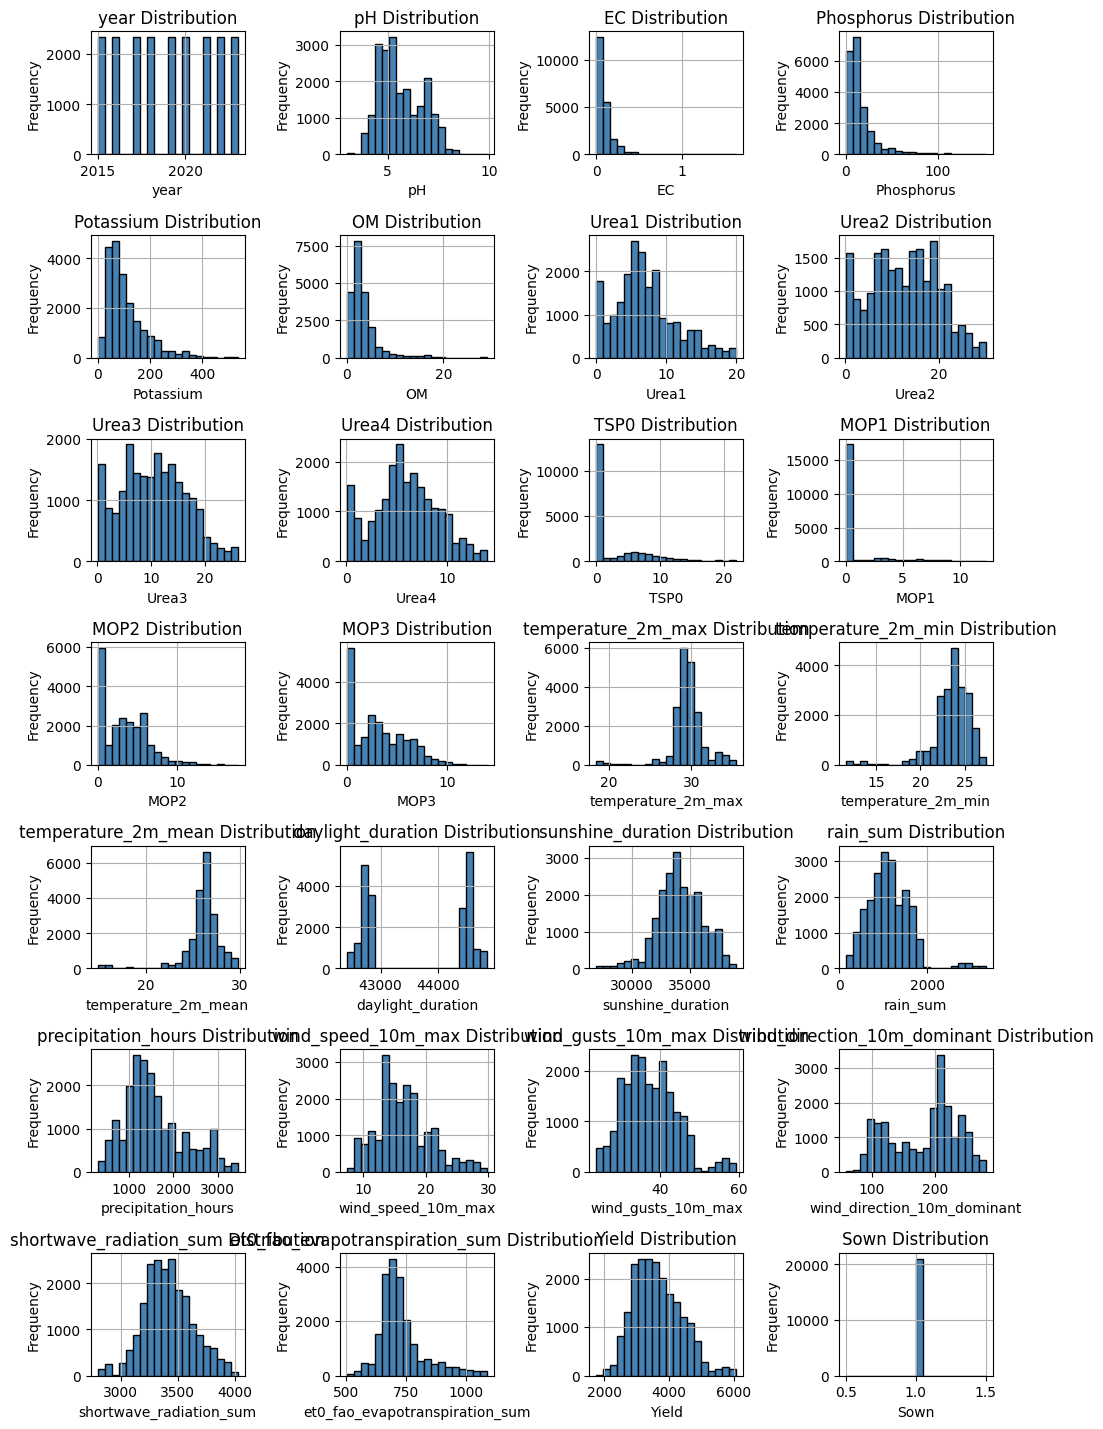

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

def showdist():
    numerical_columns = final_combined_data_cleaned.select_dtypes(include=[float, int])
    plt.figure(figsize=(10, 16))
    for i, col in enumerate(numerical_columns):
        plt.subplot(8, 4, i + 1)  # Fixed grid of 3x3
        final_combined_data_cleaned[col].hist(bins=20, color='steelblue', edgecolor='black')
        plt.title(f'{col} Distribution')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

showdist()

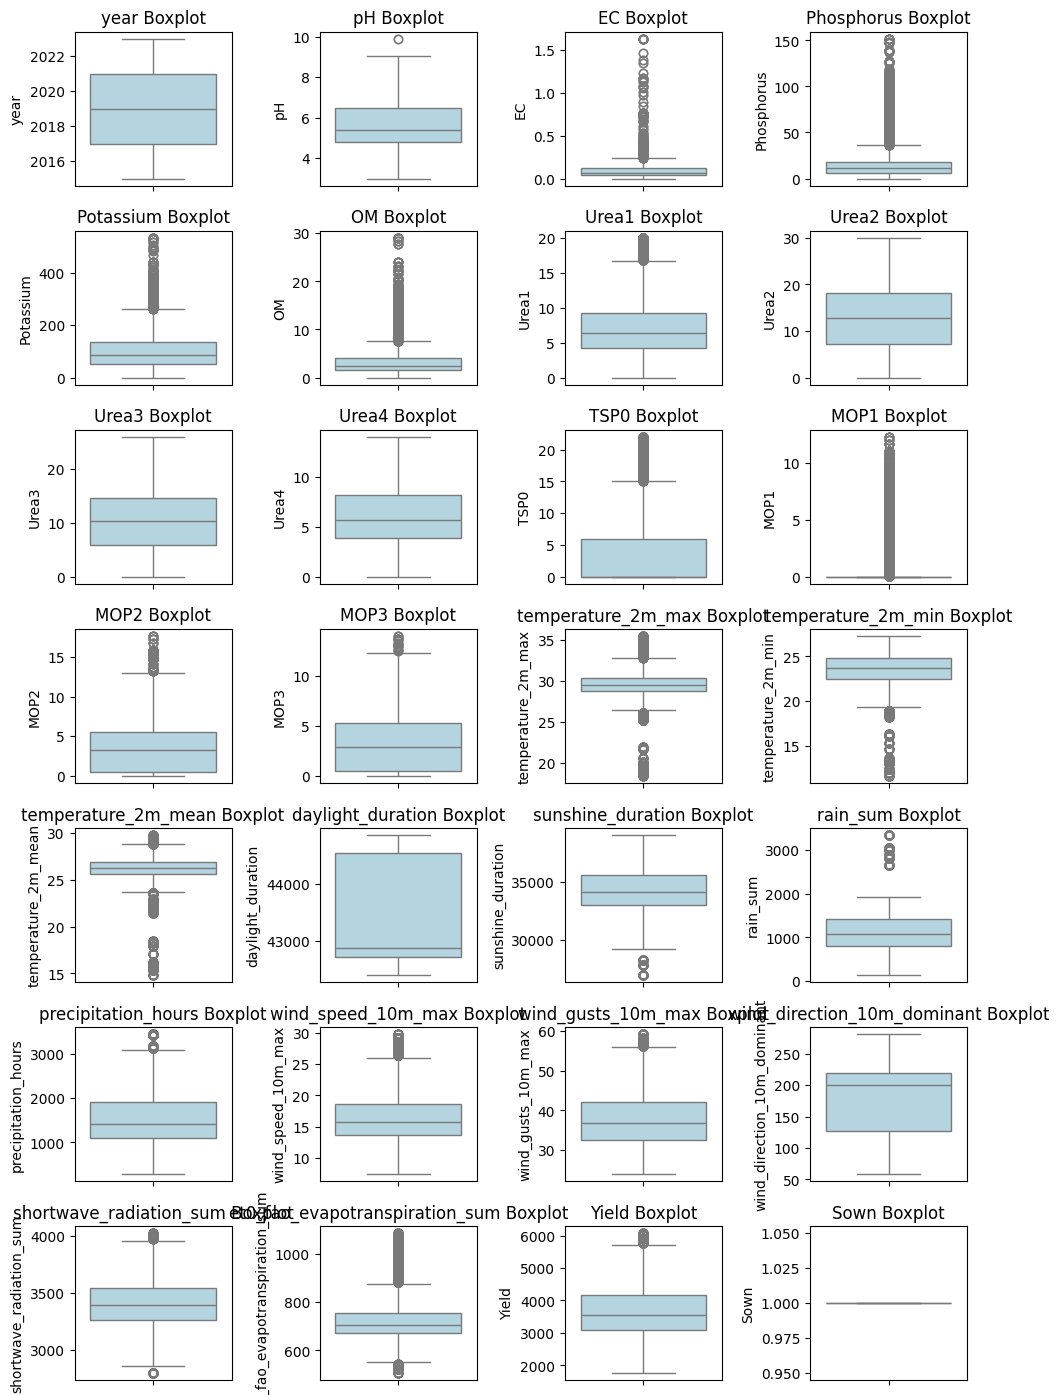

In [6]:
numerical_columns = final_combined_data_cleaned.select_dtypes(include=[float, int])

plt.figure(figsize=(10, 16))
for i, col in enumerate(numerical_columns):
    plt.subplot(8, 4, i + 1)  # Adjust the number of rows and columns as necessary
    sns.boxplot(y=final_combined_data_cleaned[col], color='lightblue')
    plt.title(f'{col} Boxplot')
plt.tight_layout()
plt.show()

##### Distribution of Target Variable (Yield): Plot the distribution of the target variable (Yield) to understand its skewness or potential outliers

### Corela

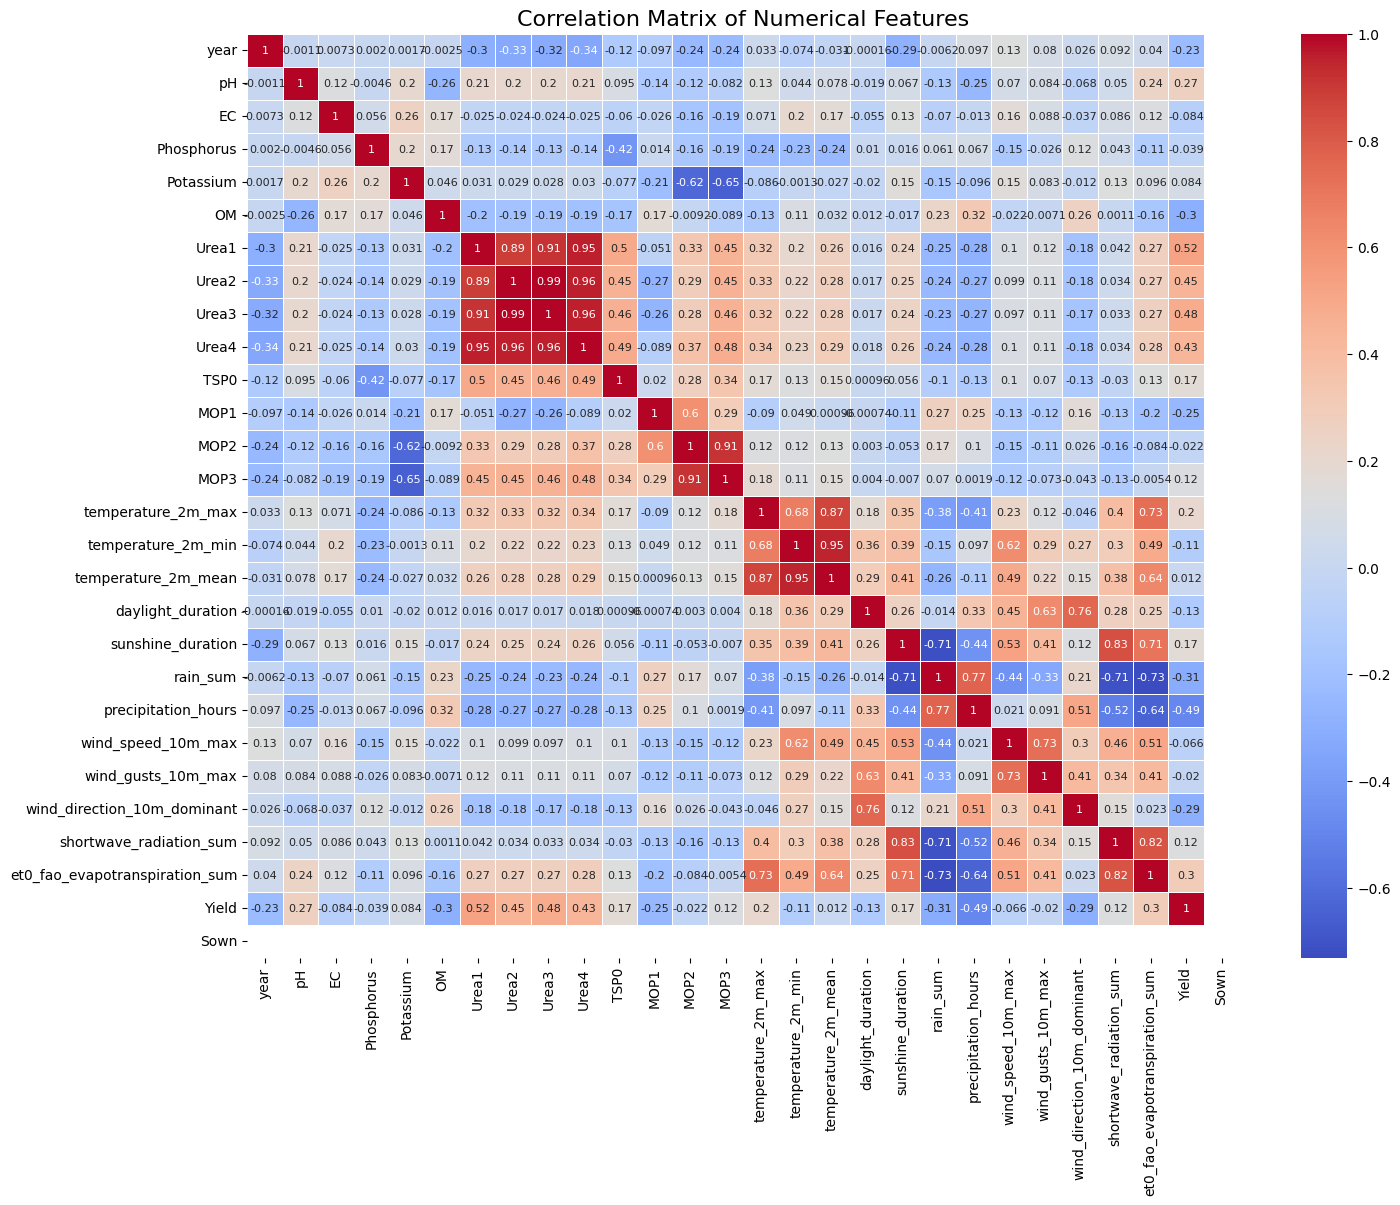

In [7]:
import numpy as np

# Selecting only the numeric columns
numeric_data = final_combined_data_cleaned.select_dtypes(include=[np.number])

# Now calculate the correlation matrix
correlation_matrix = numeric_data.corr()
import seaborn as sns
import matplotlib.pyplot as plt

# Re-generate the heatmap with improved clarity
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8})
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

<Axes: title={'center': 'Average Yield Over Seasons'}, xlabel='year,season'>

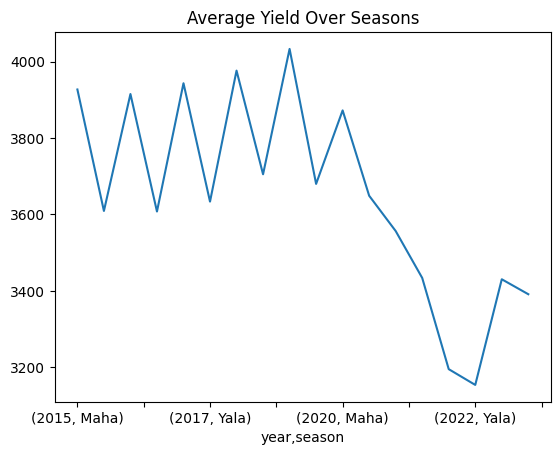

In [8]:
final_combined_data_cleaned.groupby(['year', 'season'])['Yield'].mean().plot(kind='line', title='Average Yield Over Seasons')

### Experimenting with multiple hidden layers and perceptrons

Training model with batch size: 16


d:\Projects\CDP\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1.9172 - mean_absolute_error: 1.0640 - val_loss: 0.5060 - val_mean_absolute_error: 0.5558 - learning_rate: 1.0000e-04
Epoch 2/150
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.9922 - mean_absolute_error: 0.7835 - val_loss: 0.3887 - val_mean_absolute_error: 0.4815 - learning_rate: 1.0000e-04
Epoch 3/150
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.7582 - mean_absolute_error: 0.6831 - val_loss: 0.3319 - val_mean_absolute_error: 0.4400 - learning_rate: 1.0000e-04
Epoch 4/150
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.6534 - mean_absolute_error: 0.6324 - val_loss: 0.3045 - val_mean_absolute_error: 0.4190 - learning_rate: 1.0000e-04
Epoch 5/150
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.5608 - mean_absolute_error: 0.5822 - val_loss: 0.2848 - val_mean_absolute_error: 0.4027 - learning_rate: 1.0000e-04
Epoch 6/150
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.4862 - mean_absolute_error: 0.

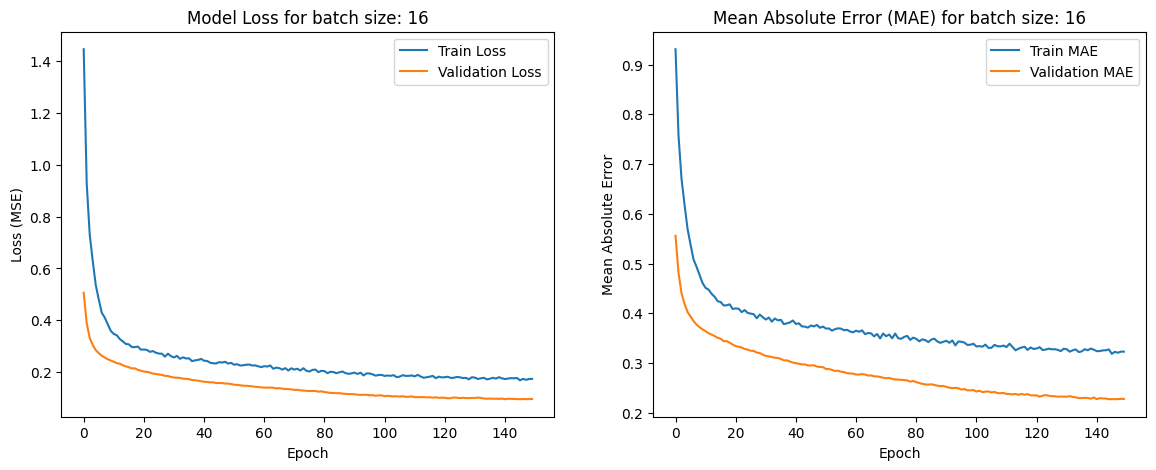

Training model with batch size: 32
Epoch 1/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1.7843 - mean_absolute_error: 1.0410 - val_loss: 0.6018 - val_mean_absolute_error: 0.5978 - learning_rate: 1.0000e-04
Epoch 2/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9313 - mean_absolute_error: 0.7526 - val_loss: 0.4337 - val_mean_absolute_error: 0.4986 - learning_rate: 1.0000e-04
Epoch 3/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7775 - mean_absolute_error: 0.6842 - val_loss: 0.3699 - val_mean_absolute_error: 0.4601 - learning_rate: 1.0000e-04
Epoch 4/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6598 - mean_absolute_error: 0.6248 - val_loss: 0.3350 - val_mean_absolute_error: 0.4379 - learning_rate: 1.0000e-04
Epoch 5/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6011 - mean_absolute_error: 0.5987 - val_loss: 0.3134 - val_mean_absolute_error: 0.4220 - learning_rate: 1.0000e-04
Epoch 6/150
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5274 - 

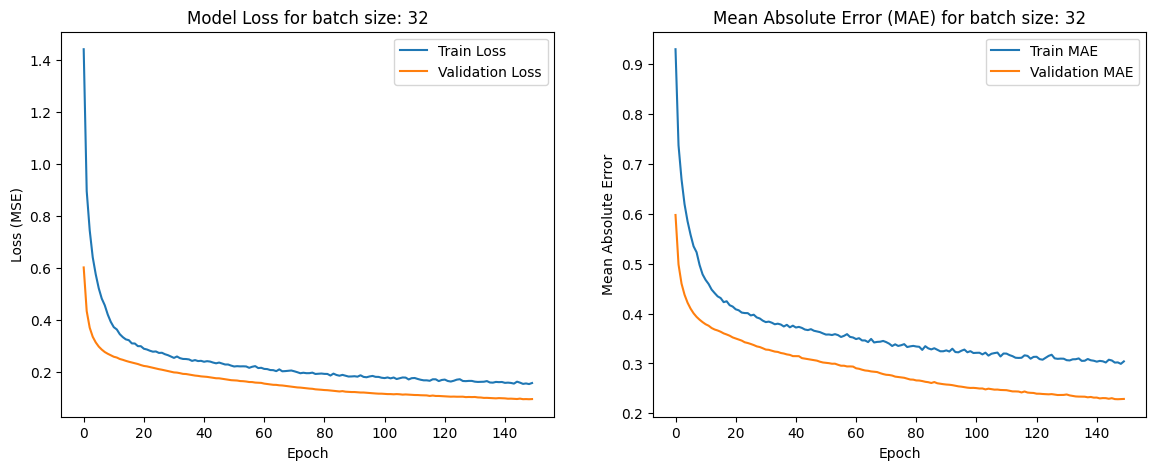

Training model with batch size: 64
Epoch 1/150
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2.7014 - mean_absolute_error: 1.2861 - val_loss: 0.8314 - val_mean_absolute_error: 0.6903 - learning_rate: 1.0000e-04
Epoch 2/150
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2755 - mean_absolute_error: 0.8754 - val_loss: 0.6125 - val_mean_absolute_error: 0.5909 - learning_rate: 1.0000e-04
Epoch 3/150
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0240 - mean_absolute_error: 0.7829 - val_loss: 0.4825 - val_mean_absolute_error: 0.5266 - learning_rate: 1.0000e-04
Epoch 4/150
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8923 - mean_absolute_error: 0.7287 - val_loss: 0.4118 - val_mean_absolute_error: 0.4843 - learning_rate: 1.0000e-04
Epoch 5/150
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8046 - mean_absolute_error: 0.6913 - val_loss: 0.3662 - val_mean_absolute_error: 0.4556 - learning_rate: 1.0000e-04
Epoch 6/150
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7014 - 

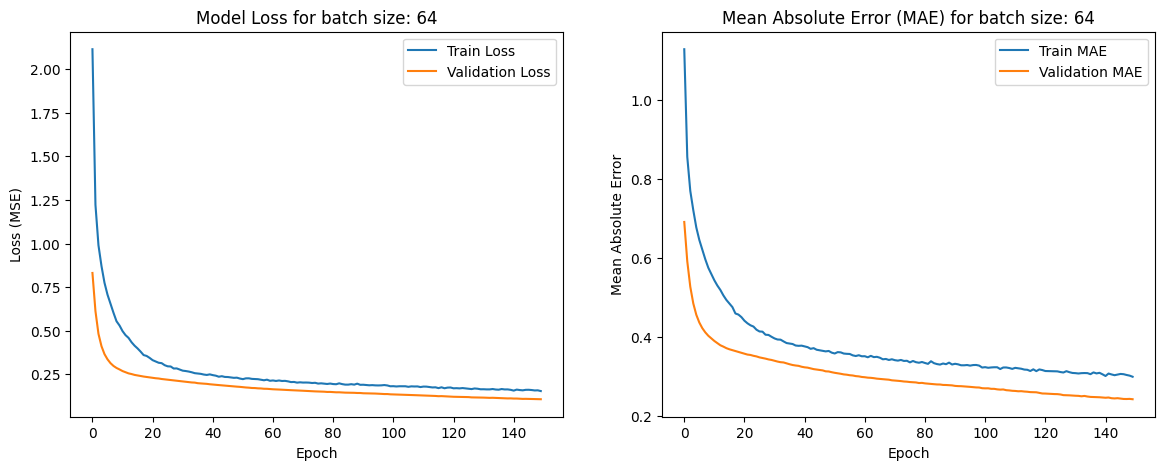

Training model with batch size: 128
Epoch 1/150
132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 2.3424 - mean_absolute_error: 1.1922 - val_loss: 0.8006 - val_mean_absolute_error: 0.6914 - learning_rate: 1.0000e-04
Epoch 2/150
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4371 - mean_absolute_error: 0.9309 - val_loss: 0.6523 - val_mean_absolute_error: 0.6193 - learning_rate: 1.0000e-04
Epoch 3/150
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1523 - mean_absolute_error: 0.8383 - val_loss: 0.5517 - val_mean_absolute_error: 0.5716 - learning_rate: 1.0000e-04
Epoch 4/150
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9766 - mean_absolute_error: 0.7752 - val_loss: 0.4823 - val_mean_absolute_error: 0.5354 - learning_rate: 1.0000e-04
Epoch 5/150
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8956 - mean_absolute_error: 0.7358 - val_loss: 0.4333 - val_mean_absolute_error: 0.5065 - learning_rate: 1.0000e-04
Epoch 6/150
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8544 -

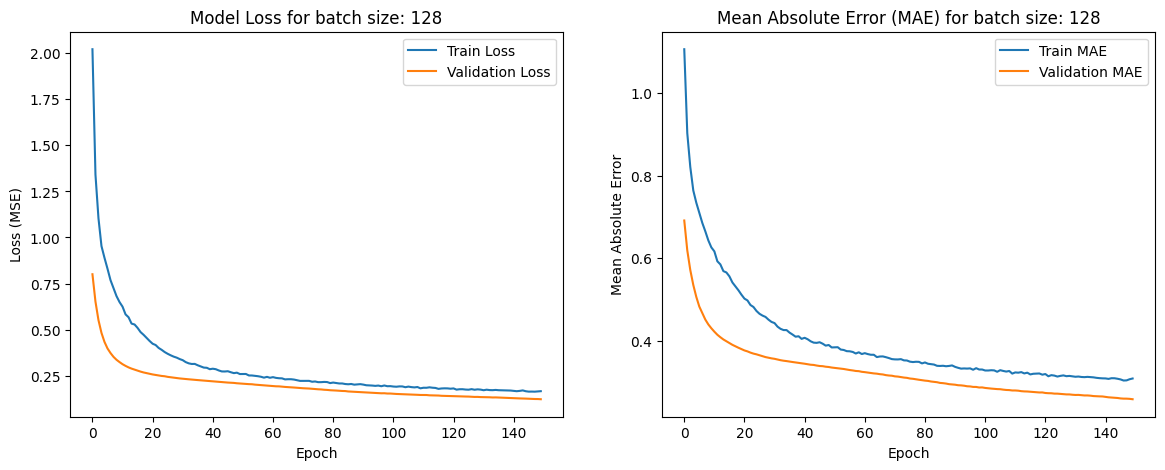

In [9]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load your data (assuming the final_combined_data_cleaned is already loaded)
final_combined_data_cleaned = pd.read_excel('6. final_dataset.xlsx')

# Label encode 'Season' (since it has an order) and use Year directly
label_encoder = LabelEncoder()
final_combined_data_cleaned['Season'] = label_encoder.fit_transform(final_combined_data_cleaned['season'])

# One-Hot Encode 'District' and 'Condition' (since they have no order)
final_combined_data_encoded = pd.get_dummies(final_combined_data_cleaned, columns=['Condition'])

# Year can be used directly without any encoding
features = ['year', 'pH', 'EC', 'Phosphorus', 'Potassium', 'OM',
            'Urea1', 'Urea2', 'Urea3', 'Urea4', 
            'TSP0', 'MOP1', 'MOP2', 'MOP3', 
            'temperature_2m_max', 'temperature_2m_min', 'temperature_2m_mean',
            'daylight_duration', 'sunshine_duration', 'rain_sum', 'precipitation_hours',
            'wind_speed_10m_max', 'wind_gusts_10m_max', 'wind_direction_10m_dominant',
            'shortwave_radiation_sum', 'et0_fao_evapotranspiration_sum', 
            'Season', 'Sown']


features.extend([col for col in final_combined_data_encoded.columns if  col.startswith('Condition_')])

X = final_combined_data_encoded[features]
y = final_combined_data_encoded['Yield']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)


def build_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))  
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(1)) 
    return model


batch_sizes = [16, 32, 64, 128]  

def train_model(batch_size):
    model = build_model(X_train.shape[1])
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error', metrics=['mean_absolute_error'])
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-7)

    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=batch_size, verbose=1,
                        callbacks=[early_stopping, reduce_lr])
    return history

def plot_results(history, batch_size):
    plt.figure(figsize=(14, 5))
    
    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model Loss for batch size: {batch_size}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend(loc='upper right')

    # Plot MAE
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mean_absolute_error'], label='Train MAE')
    plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
    plt.title(f'Mean Absolute Error (MAE) for batch size: {batch_size}')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Absolute Error')
    plt.legend(loc='upper right')
    plt.show()

# Loop over batch sizes and train models
for batch_size in batch_sizes:
    print(f"Training model with batch size: {batch_size}")
    history = train_model(batch_size)
    plot_results(history, batch_size)
